# Prelab3

### import all the needed functions

In [1]:
import cv2 as cv
import numpy as np
import random
import math
import time
from matplotlib import pyplot as plt

### import images 

In [2]:
global picName_1,picName_2

# switch to picture of sasori
# picName_1 = "sasori.jpg"
picName_1 = "spiral.jpg"
picName_2 = "lines.jpg"

## General Edge Detection

In [3]:
def General(pic,size,T):
    #num Check
    if T == 0:
        print("Invalid threshold value T =  "+str(T),"\nChange to T = "+str(20))
        T = 20
    # Smooth input imageI
    imageI = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
    imageI = cv.GaussianBlur(imageI,(5,5),10)

    # Define orthogonal kernel masks by using Sobel’s Edge Detection Mask 
    maskX = np.array(([-1,0,1], [-2,0,2],[-1,0,1]),dtype="float64")
    masky = np.array(([-1,-2,-1],[0,0,0],[1,2,1]),dtype="float64")

    # Convolve both kernel masks over input image to get Gx and Gy
    Gx = cv.filter2D(imageI,cv.CV_16S,maskX)
    Gy = cv.filter2D(imageI,cv.CV_16S,masky)
    
    # Add absolute value of Gx and Gy to caculate Gradient Magnitude G(i,j) 
    gradient = np.absolute(Gx) + np.absolute(Gy)

    # Threshold gradient image by marking all pixels in I(i,j) as edges if G(i,j) > T
    output = np.zeros((size[0],size[1]),dtype = np.uint8)
    for i in range(size[0]):
        for j in range(size[1]):
            if gradient[i][j] > T:
                output[i][j] = np.uint8(255)
    # Plot function
    plot = []
    plot.append(Gx)
    plot.append(Gy)
    plot.append(gradient)
    plot.append(output) 
    return plot

## Canny Edge Detection 

In [4]:
def Canny(pic, size, a1,a2):
    imageI = cv.cvtColor(pic,cv.COLOR_BGR2GRAY)
    imgGaussian = cv.GaussianBlur(imageI,(5,5),10)
    cannyDetection = cv.Canny(imgGaussian,a1,a2)
    return cannyDetection

## Comparison of General and Canny Edge Detectors

In [5]:
def Compare(generalDetection,cannyDetection,size):
    countSame = 0
    countDifferent = 0
    for i in range(size[0]):
        for j in range(size[1]):
            if generalDetection[i][j] == cannyDetection[i][j]:
                countSame += 1
    a = (countSame) / (size[0] * size[1])
    return a

def Compare2(pic,size,generalVal):
    imgTable = []
    diffTable = []    
    cannyDetection = Canny(pic,size,temp2,temp3)
    for T in range(generalVal[0],generalVal[1]+1): 
        imgTable.append(General(pic,size,T)[3])
    for i in range(len(imgTable)):
        diffTable.append(Compare(imgTable[i],cannyDetection,size))
    plotDiff(generalVal,diffTable,"Threshold values","Same edge ratio","Trend",picTitle[-1])
    print("Press ESC to end and check the comparison plot")

### Plot function

In [6]:
def plotFunction(pic,detail):
    plt.figure(dpi=500)
    plt.figure(figsize=(8,8))
    size = len(pic)-1
    for i in range(size):
        plt.subplot(1,size,i+1)
        plt.imshow(pic[i], cmap = "gray")
        plt.title(detail[i])
    plt.tight_layout()

### Help function

In [7]:
def plotDiff(x, y, xLabel, yLabel,dataLabel,title):
    plt.figure(dpi=500)
    plt.figure(figsize=(4,4))
    mX = []
    mY = y
    for a in range(x[0],x[1]+1):
        mX.append(a)
    plt.plot(mX,mY,'b.-',label = dataLabel)
    plt.plot(mX,mY,'y--')
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend()
    plt.tight_layout()

### Callback function

In [8]:
def TrackbarCallback(*args):
    global temp1,temp2,temp3
    temp1 = cv.getTrackbarPos(tau,generalMethod)
    temp2 = cv.getTrackbarPos(top_tau,cannyMethod)
    temp3 = cv.getTrackbarPos(bottom_tau,cannyMethod)

### Main function

Press ESC to exit the program
Press ENTER to start General and Canny Edge Detection
Press SPACE to start comparison
Begin General and Canny
Begin Compare
Press ESC to end and check the comparison plot


<Figure size 3000x2000 with 0 Axes>

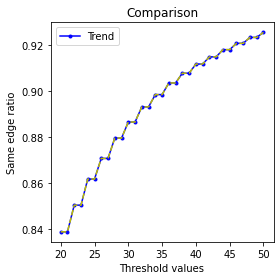

<Figure size 3000x2000 with 0 Axes>

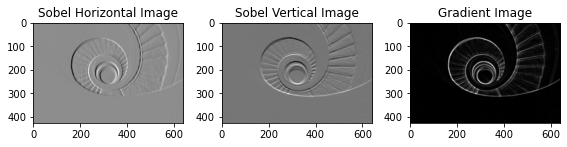

In [9]:
global generalMethod,cannyMethod
global tau,top_tau,bottom_tau
global trackbarRange,picTitle,compareRange
global temp1,temp2,temp3

generalMethod = "General Edge Detection"
cannyMethod = "Canny Edge Detection"
tau = "T"
top_tau = "T1"
bottom_tau = "T2"
trackbarRange = [0,100]
compareRange = [20,50]
trackbarSize = 50
picTitle = np.array(("Sobel Horizontal Image","Sobel Vertical Image","Gradient Image","Comparison"))

pic1 = cv.imread(picName_1)
pic2 = cv.imread(picName_2)
size_1 = [pic1.shape[0],pic1.shape[1]]
size_2 = [pic2.shape[0],pic2.shape[1]]

cv.namedWindow(generalMethod, cv.WINDOW_NORMAL)
cv.resizeWindow(generalMethod,size_1[1], size_1[0]+trackbarSize)
cv.createTrackbar(tau, generalMethod, trackbarRange[0],trackbarRange[1], TrackbarCallback)

cv.namedWindow(cannyMethod, cv.WINDOW_NORMAL)
cv.resizeWindow(cannyMethod,size_1[1], size_1[0]+trackbarSize*2)
cv.createTrackbar(top_tau, cannyMethod, trackbarRange[0],trackbarRange[1], TrackbarCallback)
cv.createTrackbar(bottom_tau, cannyMethod, trackbarRange[0],trackbarRange[1], TrackbarCallback)

temp1 = 0
temp2 = 0
temp3 = 0

cv.imshow(generalMethod,pic1)
cv.imshow(cannyMethod,pic1)
plot = []
print("Press ESC to exit the program")
print("Press ENTER to start General and Canny Edge Detection")
print("Press SPACE to start comparison")
while True:
    key = cv.waitKey(1)
    if key == 27: #press ESC to exit the program
        break
    if key == 13: #press ENTER to start
        print("Begin General and Canny")
        plot = General(pic1,size_1,temp1)
        cannyDetection = Canny(pic1,size_1,temp2,temp3)
        cv.imshow(generalMethod,plot[-1])
        cv.imshow(cannyMethod,cannyDetection) 
    if key == 32: 
        print("Begin Compare")
        Compare2(pic1,size_1,compareRange)
if len(plot) == 0:
    print("No threshold value, set threshold to "+str(20))
    plot = General(pic1,size_1,20)
plotFunction(plot,picTitle)
cv.destroyAllWindows()